# CoronaData

### Analyze open data of RIVM 
Johan van Voskuilen, 16-08-2020

##### Import Python modules

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import urllib.request

##### Import data

In [2]:
dataurl = 'https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_cumulatief.csv'
with urllib.request.urlopen(dataurl) as response:
    df = pd.read_csv(response, delimiter=';', parse_dates=[0], index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58720 entries, 2020-03-13 10:00:00 to 2020-08-19 10:00:00
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Municipality_code   56800 non-null  object
 1   Municipality_name   56800 non-null  object
 2   Province            58720 non-null  object
 3   Total_reported      58720 non-null  int64 
 4   Hospital_admission  58720 non-null  int64 
 5   Deceased            58720 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [3]:
df.describe()

,Total_reported,Hospital_admission,Deceased
count,58720.000000,58720.000000,58720.000000
mean,110.476090,27.234724,12.975732
std,228.576728,49.397778,27.032023
min,0.000000,0.000000,0.000000
25%,26.000000,6.000000,2.000000
50%,59.000000,15.000000,6.000000
75%,124.000000,31.000000,14.000000
max,5037.000000,652.000000,350.000000


##### Analyze data

###### Analyze cumulative per day

In [4]:
df['2020-03-13'].sum()

Province              GroningenGroningenGroningenGroningenFlevolandG...
Total_reported                                                      804
Hospital_admission                                                  115
Deceased                                                              9
dtype: object

In [5]:
CumulativePerDay = df.groupby(df.index.date).sum()

In [6]:
CumulativePerDay.index

Index([2020-03-13, 2020-03-14, 2020-03-15, 2020-03-16, 2020-03-17, 2020-03-18,
       2020-03-19, 2020-03-20, 2020-03-21, 2020-03-22,
       ...
       2020-08-10, 2020-08-11, 2020-08-12, 2020-08-13, 2020-08-14, 2020-08-15,
       2020-08-16, 2020-08-17, 2020-08-18, 2020-08-19],
      dtype='object', length=160)

###### Calculate differential per day

In [7]:
CumulativePerDay

,Total_reported,Hospital_admission,Deceased
2020-03-13,804,115,9
2020-03-14,959,136,12
2020-03-15,1135,162,19
2020-03-16,1413,205,23
2020-03-17,1705,314,40
...,...,...,...
2020-08-15,62495,12027,6169
2020-08-16,63002,12033,6172
2020-08-17,63484,12038,6172
2020-08-18,63973,12042,6175


In [8]:
DifferencePerDay = CumulativePerDay.diff().fillna(CumulativePerDay).astype(int)
DifferencePerDay.tail(25)

,Total_reported,Hospital_admission,Deceased
2020-07-26,214,2,0
2020-07-27,205,5,1
2020-07-28,223,6,4
2020-07-29,247,3,2
2020-07-30,342,5,0
2020-07-31,338,7,0
2020-08-01,431,3,1
2020-08-02,366,6,1
2020-08-03,372,6,0
2020-08-04,485,10,1


###### Add rolling mean for total reported

In [9]:
DifferencePerDay['Total_reported_rollingmean3days'] = DifferencePerDay['Total_reported'].rolling(3, min_periods=1).mean()
DifferencePerDay.tail()

,Total_reported,Hospital_admission,Deceased,Total_reported_rollingmean3days
2020-08-15,655,7,2,622.666667
2020-08-16,507,6,3,599.333333
2020-08-17,482,5,0,548.000000
2020-08-18,489,4,3,492.666667
2020-08-19,552,18,6,507.666667


###### Weekly rolling sum of new reported cases

In [10]:
Weekly = pd.DataFrame(index=DifferencePerDay.index)
Weekly['New_reported_rollingsum1week'] = DifferencePerDay['Total_reported'].rolling(7, min_periods=1).sum()
Weekly.tail()

,New_reported_rollingsum1week
2020-08-15,4508.0
2020-08-16,4438.0
2020-08-17,4290.0
2020-08-18,4000.0
2020-08-19,3898.0


##### Plot results

Plot of cumulative numbers

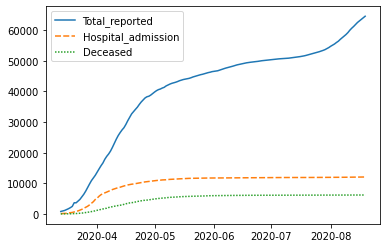

In [11]:
ax = sns.lineplot(data = CumulativePerDay)

Plot of last days (cumulative)

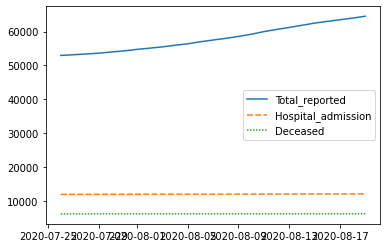

In [12]:
ax = sns.lineplot(data = CumulativePerDay[-25:])

Plot of difference per day

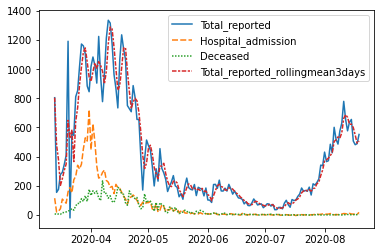

In [13]:
ax = sns.lineplot(data=DifferencePerDay)

Plot of last days (differential)

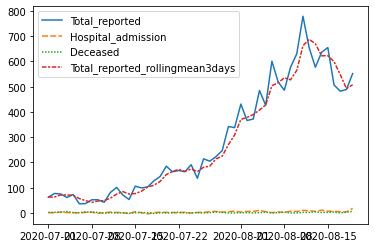

In [14]:
ax = sns.lineplot(data=DifferencePerDay[-50:])

Results of last days:

In [15]:
DifferencePerDay.tail()

,Total_reported,Hospital_admission,Deceased,Total_reported_rollingmean3days
2020-08-15,655,7,2,622.666667
2020-08-16,507,6,3,599.333333
2020-08-17,482,5,0,548.000000
2020-08-18,489,4,3,492.666667
2020-08-19,552,18,6,507.666667


Weekly result of new reported cases:

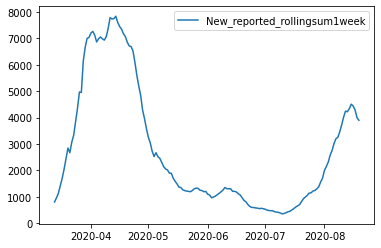

In [16]:
ax = sns.lineplot(data=Weekly)